In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)
import matplotlib.pyplot as plt

#data loading and scaling

data = pd.read_csv("task_data.csv", decimal=",")


X = data[[
    "Heart width", "Lung width", "CTR - Cardiothoracic Ratio",
    "xx", "yy", "xy", "normalized_diff", "Inscribed circle radius",
    "Polygon Area Ratio", "Heart perimeter","Heart area ", "Lung area"
]]

y = data["Cardiomegaly"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#hyperparameter tuning for logistic regression

param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__penalty": ["l2"],
    "model__solver": ["liblinear", "saga", "newton-cg", "newton-cholesky"]
}

rskf = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=None
)

pipe_log = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())   
])

grid_search = GridSearchCV(
    estimator=pipe_log,         
    param_grid=param_grid,       
    scoring="accuracy",          
    cv=rskf,                    
    verbose=1,                   
    n_jobs=-1                    
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy (averaged CV): {grid_search.best_score_:.4f}")


Fitting 50 folds for each of 20 candidates, totalling 1000 fits
Best parameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best accuracy (averaged CV): 0.7940


In [22]:
#logistic regression

print("Logistic regression\n")

pipe_log = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        C=1,
        penalty="l2",
        solver="saga",
        max_iter=2000,
        class_weight=None
    ))
])

pipe_log.fit(X_train, y_train)

cv_score = np.round(cross_val_score(pipe_log, X_train, y_train), 2)

print("Scores of training data cross-validation (each fold):")
for score in cv_score:
    print(score)

print(f"\nCross-validation mean score: {cv_score.mean():.3f}")
print(f"Standard deviation of CV score: {cv_score.std():.3f}")


Logistic regression

Scores of training data cross-validation (each fold):
0.83
0.83
0.83
0.83
0.8

Cross-validation mean score: 0.824
Standard deviation of CV score: 0.012


In [26]:
#hyperparameter tuning for knn

param_grid = {
    "model__n_neighbors": [3, 5, 7, 9, 11, 15],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["minkowski", "manhattan", "euclidean", "chebyshev"]
}

rskf = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=None
)

pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())   
])

grid_search = GridSearchCV(
    estimator=pipe_knn,         
    param_grid=param_grid,       
    scoring="accuracy",          
    cv=rskf,                    
    verbose=1,                   
    n_jobs=-1                    
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy (averaged CV): {grid_search.best_score_:.4f}")

Fitting 50 folds for each of 48 candidates, totalling 2400 fits
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'uniform'}
Best accuracy (averaged CV): 0.8480


In [27]:
#hyperparameter tuning 2 for knn

param_grid = {
    "model__n_neighbors": [4, 5, 6],
    "model__weights": ["uniform"],
    "model__metric": ["manhattan"]
}

rskf = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=None
)

pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())   
])

grid_search = GridSearchCV(
    estimator=pipe_knn,         
    param_grid=param_grid,       
    scoring="accuracy",          
    cv=rskf,                    
    verbose=1,                   
    n_jobs=-1                    
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy (averaged CV): {grid_search.best_score_:.4f}")

Fitting 50 folds for each of 3 candidates, totalling 150 fits
Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 6, 'model__weights': 'uniform'}
Best accuracy (averaged CV): 0.8400


In [28]:
#knn

print("KNN\n")

pipe_knn = Pipeline(steps=[
    ("scaler", StandardScaler()),    
    ("model", KNeighborsClassifier(  
        n_neighbors = 6,             
        weights='uniform',         
        metric='manhattan'        
    ))
])

pipe_knn.fit(X_train, y_train)

cv_score = np.round(cross_val_score(pipe_knn, X_train, y_train), 2)

print("Scores of training data cross-validation (each fold):")
for score in cv_score:
    print(score)
print(f"\nCross-validation mean score: {np.mean(cv_score):.3}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

KNN

Scores of training data cross-validation (each fold):
1.0
1.0
0.83
0.67
1.0

Cross-validation mean score: 0.9
Standard deviation of CV score: 0.133


In [7]:
#hyperparameter tuning for random forest

clf_rf = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth':[2, 6, None],
    'min_samples_split':[2, 4, 8],
    'n_estimators':[10, 100],
    'min_samples_leaf':[1, 3, 5],
    'max_features':['log2', 'sqrt', None]
}

rskf = RepeatedStratifiedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=None
)

grid_search = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid,
    cv=rskf,               
    scoring='accuracy', 
    verbose=1,
    n_jobs=-1           
)

grid_search.fit(X_train, y_train)

cv_score = np.round(cross_val_score(clf_rf, X_train, y_train), 2)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy (averaged CV): {grid_search.best_score_:.4f}")

Fitting 50 folds for each of 162 candidates, totalling 8100 fits
Best parameters: {'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}
Best accuracy (averaged CV): 0.8267


In [14]:
#random forest

print("Random Forest/n")

clf_rf = RandomForestClassifier(
    max_depth=2,                    
    min_samples_split=8,             
    n_estimators=100,               
    min_samples_leaf=1,              
    max_features='log2'              
)

clf_rf.fit(X_train, y_train)

cv_score = np.round(cross_val_score(clf_rf, X_train, y_train), 2)

print(f"Scores of training data cross-validation (each fold):")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3f}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

Random Forest/n
Scores of training data cross-validation (each fold):
0.83
0.83
0.83
0.83
1.0

Cross-validation mean score: 0.864
Standard deviation of CV score: 0.068


### Models score

| Classifier | Accuracy |
|:----------:|:--------:|
| Logistic Regression | 82.4% |
| KNN | 90% |
| Random Forest | 86.4% |

In [23]:
#running the model on the test dataset

y_pred_log  = pipe_log.predict(X_test)
y_pred_knn  = pipe_knn.predict(X_test)
y_pred_rf  = clf_rf.predict(X_test)

y_pred_prob_log  = pipe_log.predict_proba(X_test)[:, 1]
y_pred_prob_knn  = pipe_knn.predict_proba(X_test)[:, 1]
y_pred_prob_rf  = clf_rf.predict_proba(X_test)[:, 1]

acc_log  = accuracy_score(y_test, y_pred_log)
acc_knn  = accuracy_score(y_test, y_pred_knn)
acc_rf  = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy on test set:")
print(f"- Accuracy of Logistic Regression model on test dataset: {acc_log:.4f}")
print(f"- Accuracy of KNN Classifier model on test dataset: {acc_knn:.4f}")
print(f"- Accuracy of Random Forest model on test dataset: {acc_rf:.4f}")

Accuracy on test set:
- Accuracy of Logistic Regression model on test dataset: 0.7500
- Accuracy of KNN Classifier model on test dataset: 0.6250
- Accuracy of Random Forest model on test dataset: 0.6250


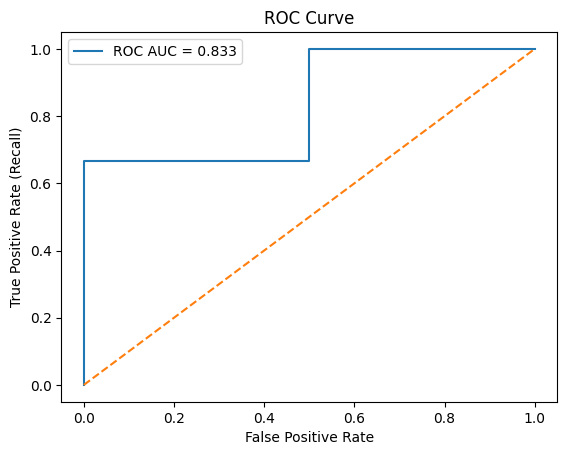

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_log)
auc_roc = roc_auc_score(y_test, y_pred_prob_log)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

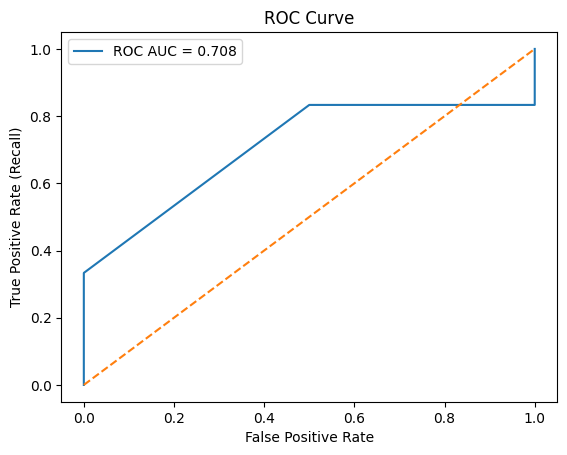

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
auc_roc = roc_auc_score(y_test, y_pred_prob_knn)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

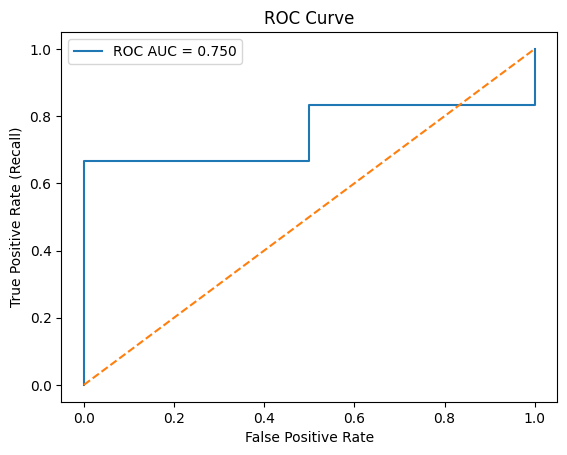

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
auc_roc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {auc_roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()